In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
weight = np.array([2,5,3,6,4,9,7,5,9,7,6,10])
price = np.array([20,35,50,25,30,40,75,55,60,95,66,78])

In [7]:
df = pd.DataFrame({'weight': weight, 'price': price})
df

,weight,price
0,2,20
1,5,35
2,3,50
3,6,25
4,4,30
5,9,40
6,7,75
7,5,55
8,9,60
9,7,95


In [9]:
x = df[['weight']]
y = df['price']

Text(0, 0.5, 'price')

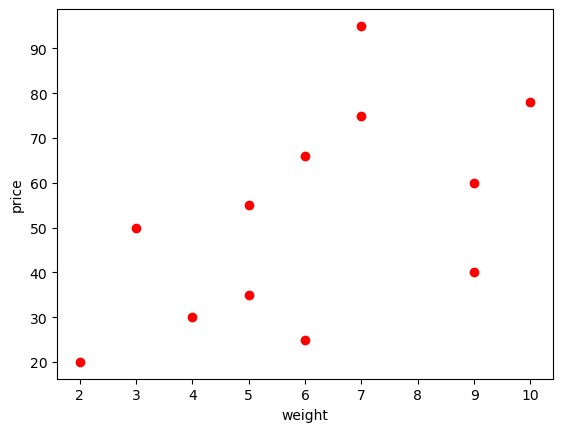

In [15]:
import matplotlib .pyplot as plt
plt.scatter(df.weight, df.price, marker='o', color= 'red')
plt.xlabel('weight')
plt.ylabel('price')

In [21]:
N = len(weight)
sum_x = np.sum(weight)
sum_y = np.sum(price)
sum_xy = np.sum(weight * price)
sum_x2 = np.sum(weight**2)

slope_formula1 = ( N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
intercept_formula1 = ( sum_y - slope_formula1 * sum_x) / N
print(f"Slope (M): {slope_formula1}")
print(f"Intercept (C): {intercept_formula1}")

Slope (M): 5.224159402241594
Intercept (C): 20.636363636363637


In [23]:
def predict(weight,slope,intercept):
    return slope * weight + intercept

predicted_prices = predict(df.weight, slope_formula1, intercept_formula1)

In [27]:
df['predicted_prices'] = predicted_prices
df

,weight,price,predicted_prices
0,2,20,31.084682
1,5,35,46.757161
2,3,50,36.308842
3,6,25,51.981320
4,4,30,41.533001
5,9,40,67.653798
6,7,75,57.205479
7,5,55,46.757161
8,9,60,67.653798
9,7,95,57.205479


In [33]:
df['Residuals'] = df['price'] - predicted_prices
df.head()

,weight,price,predicted_prices,Residuals
0,2,20,31.084682,-11.084682
1,5,35,46.757161,-11.757161
2,3,50,36.308842,13.691158
3,6,25,51.981320,-26.981320
4,4,30,41.533001,-11.533001


Text(0, 0.5, 'price')

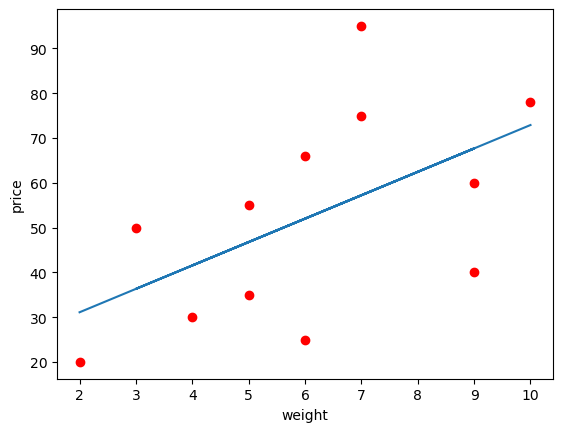

In [35]:
plt.scatter(df.weight, df.price, marker='o', color= 'red')
plt.plot(df.weight, predicted_prices)
plt.xlabel('weight')
plt.ylabel('price')

In [37]:
mse = np.mean((df['price'] - df['predicted_prices']) ** 2)
mae = np.mean(df['price'] - df['predicted_prices'])
mse,mae

(347.38646741386475, -5.921189464667501e-16)